In [ ]:
# Getting Python ready
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
import textwrap
#%matplotlib widget

In [ ]:
def aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp = 1, numTrialsInAnExp = 1, profitLoss=[1,0]):

    repeatIndex = 0
    observation = np.ones((numRepeatsOfExp, numTrialsInAnExp))
    #print(observation)

    observation = randomNumGen.random((numRepeatsOfExp, numTrialsInAnExp))

    index_ge1 = np.less_equal(observation, bernoulliParam_p)

    observation[index_ge1] = profitLoss[0]
    observation[np.invert(index_ge1)] = profitLoss[1]


    # while (repeatIndex < numRepeatsOfExp):
    #     observation[repeatIndex,:] = randomNumGen.random((1, numTrialsInAnExp))
    #     #index_ge1 = np.greater_equal(observation[repeatIndex,:], bernoulliParam_p)
    #     index_ge1 = np.less_equal(observation[repeatIndex,:], bernoulliParam_p)

    #     #print(observation[repeatIndex,:])
    #     #print(index_ge1)

    #     observation[repeatIndex,index_ge1] = profitLoss[0]
    #     observation[repeatIndex, np.invert(index_ge1)] = profitLoss[1]

    #     #print(observation[repeatIndex,:])

    #     #print(np.sum(observation[repeatIndex,:])/numTrialsInAnExp)
    #     repeatIndex = repeatIndex + 1
    print("observed values " , observation)
    return observation

In [ ]:
v_numTrialsInAnExp = 20
v_numRepeatsOfExp = 1
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(1236), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = v_numTrialsInAnExp, profitLoss=[1,0])


observed values  [[0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


The histogram values are: [17  3]
The histogram values are: [0.  0.5 1. ]


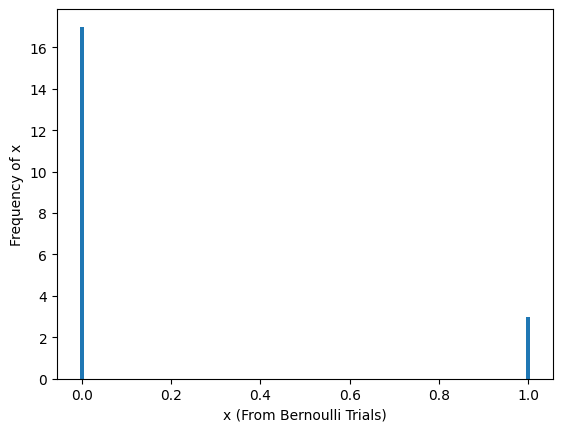

In [ ]:
#Prints and plots
# print(("The array of observations (1 row per experiment repeat):", observation))
# print(("Frequency of ones  (1 row per experiment repeat):",np.sum(observation,axis=1)))

fig1, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True)

histVal = np.histogram(observation, bins=[0,0.5,1],density=False)
#histVal = ax1.hist(observation[0][:], bins=range(0,2), density=False, align='left')

print("The histogram values are:", histVal[0])
print("The histogram values are:", histVal[1])
#print("The histogram values are:", histVal[1][0,2])

ax1.bar([0, 1], histVal[0]/v_numRepeatsOfExp, width = 0.01)

ax1.set_xlabel("x (From Bernoulli Trials)")
ax1.set_ylabel("Frequency of x")
fig1.set_label("No of Trials of Bern Exp is " + str(v_numTrialsInAnExp))

In [ ]:
frequentists = []

v_bernoulliParam_p = 0.2


observationFreqentist1 = aBernoulliExperiment(np.random.default_rng(123768), bernoulliParam_p=v_bernoulliParam_p, numTrialsInAnExp = 20, numRepeatsOfExp=5, profitLoss=[1,0])


observed values  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
freq_arr = np.sum(observationFreqentist1,axis=1)
print("Number of ones per experiment of 20 trials is:\n" ,freq_arr,"\n")

freq_01_arr = [x/20for x in freq_arr]
print("Frequency of Success - 1s per experiment:\n" ,freq_01_arr,"\n")

freq_00_arr = [1-(x/20) for x in freq_arr]
print("Frequency of Failure - 0s per experiment:\n" ,freq_00_arr,"\n")

Number of ones per experiment of 20 trials is:
 [3. 2. 4. 4. 2.] 

Frequency of Success - 1s per experiment:
 [0.15, 0.1, 0.2, 0.2, 0.1] 

Frequency of Failure - 0s per experiment:
 [0.85, 0.9, 0.8, 0.8, 0.9] 



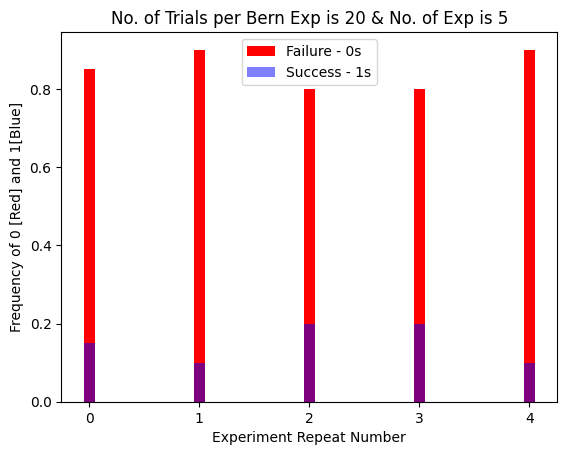

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_bar_graphs(frequencies_0, frequencies_1,numRepeatsOfExp=5,numTrialsInAnExp=20):
    x = np.arange(numRepeatsOfExp)  # X-axis values - Experiment Number (0, 1, 2, 3, 4)

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plotting the 0s bar graph
    ax.bar(x, frequencies_0, color='red', width = 0.1, label='Failure - 0s')

    # Plotting the 1s bar graph
    ax.bar(x, frequencies_1, color='blue',width = 0.1, label='Success - 1s', alpha=0.5)

    # Label the plot
    ax.set_xlabel('Experiment Repeat Number')
    ax.set_ylabel('Frequency of 0 [Red] and 1[Blue]')
    ax.set_title("No. of Trials per Bern Exp is " + str(numTrialsInAnExp) + " & No. of Exp is " + str(numRepeatsOfExp))
    ax.legend()

    # Show the plot
    plt.show()

plot_multiple_bar_graphs(freq_00_arr,freq_01_arr,5,20)

In [ ]:
observationFreqentist2 = aBernoulliExperiment(np.random.default_rng(123768), bernoulliParam_p=v_bernoulliParam_p, numTrialsInAnExp = 20, numRepeatsOfExp=100, profitLoss=[1,0])

observed values  [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
freq_arr = np.sum(observationFreqentist2,axis=1)
print("Number of ones per experiment of 20 trials is:\n" ,freq_arr,"\n")

freq_01_arr = [x/20for x in freq_arr]
print("Frequency of Success - 1s per experiment:\n" ,freq_01_arr,"\n")

freq_00_arr = [1-(x/20) for x in freq_arr]
print("Frequency of Failure - 0s per experiment:\n" ,freq_00_arr,"\n")

Number of ones per experiment of 20 trials is:
 [3. 2. 4. 4. 2. 5. 5. 7. 2. 3. 4. 6. 6. 2. 6. 5. 4. 3. 4. 4. 0. 5. 6. 2.
 4. 0. 5. 1. 5. 4. 4. 7. 7. 2. 3. 4. 2. 3. 6. 4. 3. 2. 4. 3. 3. 4. 3. 4.
 3. 4. 4. 2. 3. 2. 3. 6. 2. 5. 5. 4. 3. 3. 5. 4. 6. 2. 3. 5. 5. 7. 3. 3.
 2. 6. 2. 1. 3. 4. 2. 3. 1. 5. 0. 5. 3. 3. 3. 5. 4. 3. 7. 4. 8. 3. 1. 7.
 4. 3. 2. 4.] 

Frequency of Success - 1s per experiment:
 [0.15, 0.1, 0.2, 0.2, 0.1, 0.25, 0.25, 0.35, 0.1, 0.15, 0.2, 0.3, 0.3, 0.1, 0.3, 0.25, 0.2, 0.15, 0.2, 0.2, 0.0, 0.25, 0.3, 0.1, 0.2, 0.0, 0.25, 0.05, 0.25, 0.2, 0.2, 0.35, 0.35, 0.1, 0.15, 0.2, 0.1, 0.15, 0.3, 0.2, 0.15, 0.1, 0.2, 0.15, 0.15, 0.2, 0.15, 0.2, 0.15, 0.2, 0.2, 0.1, 0.15, 0.1, 0.15, 0.3, 0.1, 0.25, 0.25, 0.2, 0.15, 0.15, 0.25, 0.2, 0.3, 0.1, 0.15, 0.25, 0.25, 0.35, 0.15, 0.15, 0.1, 0.3, 0.1, 0.05, 0.15, 0.2, 0.1, 0.15, 0.05, 0.25, 0.0, 0.25, 0.15, 0.15, 0.15, 0.25, 0.2, 0.15, 0.35, 0.2, 0.4, 0.15, 0.05, 0.35, 0.2, 0.15, 0.1, 0.2] 

Frequency of Failure - 0s per experiment:
 [0.85,

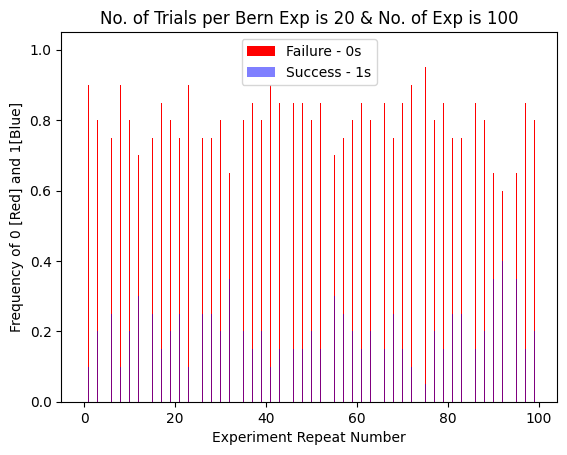

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_bar_graphs(frequencies_0, frequencies_1,numRepeatsOfExp=100,numTrialsInAnExp=20):
    x = np.arange(numRepeatsOfExp)  # X-axis values - Experiment Number (0, 1, 2, 3, 4)

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plotting the 0s bar graph
    ax.bar(x, frequencies_0, color='red', width = 0.1, label='Failure - 0s')

    # Plotting the 1s bar graph
    ax.bar(x, frequencies_1, color='blue',width = 0.1, label='Success - 1s', alpha=0.5)

    # Label the plot
    ax.set_xlabel('Experiment Repeat Number')
    ax.set_ylabel('Frequency of 0 [Red] and 1[Blue]')
    ax.set_title("No. of Trials per Bern Exp is " + str(numTrialsInAnExp) + " & No. of Exp is " + str(numRepeatsOfExp))
    ax.legend()

    # Show the plot
    plt.show()

plot_multiple_bar_graphs(freq_00_arr,freq_01_arr,100,20)

In [ ]:

freq_arr_modf = [x for x in freq_arr if x >= 3]
num_exp = len(freq_arr_modf)
print("Number of ones >= 3 is in %s experiments:\n" %num_exp,freq_arr_modf,"\n")

freq_01_arr_modf = [x/20for x in freq_arr_modf]
print("Frequency of Success 1s per experiment with 1s >= 3 is:\n" ,freq_01_arr_modf,"\n")

print("Observed value of p = " + str(np.sum(freq_01_arr_modf)/num_exp))

Number of ones >= 3 is in 77 experiments:
 [3.0, 4.0, 4.0, 5.0, 5.0, 7.0, 3.0, 4.0, 6.0, 6.0, 6.0, 5.0, 4.0, 3.0, 4.0, 4.0, 5.0, 6.0, 4.0, 5.0, 5.0, 4.0, 4.0, 7.0, 7.0, 3.0, 4.0, 3.0, 6.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 6.0, 5.0, 5.0, 4.0, 3.0, 3.0, 5.0, 4.0, 6.0, 3.0, 5.0, 5.0, 7.0, 3.0, 3.0, 6.0, 3.0, 4.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 5.0, 4.0, 3.0, 7.0, 4.0, 8.0, 3.0, 7.0, 4.0, 3.0, 4.0] 

Frequency of Success 1s per experiment with 1s >= 3 is:
 [0.15, 0.2, 0.2, 0.25, 0.25, 0.35, 0.15, 0.2, 0.3, 0.3, 0.3, 0.25, 0.2, 0.15, 0.2, 0.2, 0.25, 0.3, 0.2, 0.25, 0.25, 0.2, 0.2, 0.35, 0.35, 0.15, 0.2, 0.15, 0.3, 0.2, 0.15, 0.2, 0.15, 0.15, 0.2, 0.15, 0.2, 0.15, 0.2, 0.2, 0.15, 0.15, 0.3, 0.25, 0.25, 0.2, 0.15, 0.15, 0.25, 0.2, 0.3, 0.15, 0.25, 0.25, 0.35, 0.15, 0.15, 0.3, 0.15, 0.2, 0.15, 0.25, 0.25, 0.15, 0.15, 0.15, 0.25, 0.2, 0.15, 0.35, 0.2, 0.4, 0.15, 0.35, 0.2, 0.15, 0.2] 

Observed value of p = 0.2175324675324675


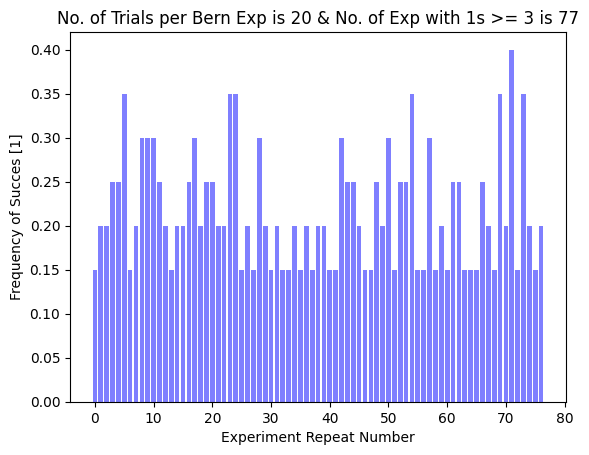

In [ ]:
def plot_multiple_bar_graphs(frequencies_1,numRepeatsOfExp=1,numTrialsInAnExp=1):
    x = np.arange(numRepeatsOfExp)  # X-axis values - Experiment Number (0, 1, 2, 3, 4)

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plotting the 1s bar graph
    ax.bar(x, frequencies_1, color='blue',width = 0.8, label='Success - 1s',alpha = 0.5)

    # Label the plot
    ax.set_xlabel('Experiment Repeat Number')
    ax.set_ylabel('Frequency of Succes [1]')
    ax.set_title("No. of Trials per Bern Exp is " + str(numTrialsInAnExp) + " & No. of Exp with 1s >= 3 is " + str(numRepeatsOfExp))

    # Show the plot
    plt.show()

plot_multiple_bar_graphs(freq_01_arr_modf,num_exp,20)

In [ ]:
#Question 2

np.random.seed(36)
values = sorted(np.random.randint(0, 101, size=4))
print("Random values = ",values)

Random values =  [5, 30, 40, 98]


In [ ]:
np.random.default_rng(8946729)
value = [values]

outcomes = np.ndarray((np.shape(value)[1],100000))
valueArray = np.ones((np.shape(value)[1],100000))
print("The shapes are ", valueArray.shape,"\n", outcomes.shape)
valueArray = valueArray * np.transpose(value)
print(valueArray)
outcomes = np.random.poisson(lam = valueArray, size=np.shape(outcomes))
print("The outcomes of experiments are ", outcomes.shape,"\n", outcomes)

The shapes are  (4, 100000) 
 (4, 100000)
[[ 5.  5.  5. ...  5.  5.  5.]
 [30. 30. 30. ... 30. 30. 30.]
 [40. 40. 40. ... 40. 40. 40.]
 [98. 98. 98. ... 98. 98. 98.]]
The outcomes of experiments are  (4, 100000) 
 [[  5   5   1 ...   5   3   3]
 [ 27  37  28 ...  30  35  35]
 [ 38  34  43 ...  41  47  44]
 [ 85  95 112 ...  95  95 103]]


The histogram values are: (array([  688,  3312,  8512, 14037, 17426, 17739, 14562, 10452,  6472,
        3622,  1843,   803,   341,   164,   103,   135,   218,   340,
         573,   896,  1368,  1983,  2739,  3552,  4385,  5443,  6246,
        7195,  8092,  8512,  9267,  9367,  9682,  9409,  9632,  9332,
        9096,  8919,  8386,  8125,  7691,  7175,  6539,  5892,  5393,
        4644,  4007,  3279,  2898,  2337,  1874,  1426,  1051,   820,
         582,   443,   297,   222,   137,   103,    91,    54,    32,
          18,    24,     8,    14,    14,    28,    52,    49,    84,
         105,   134,   181,   275,   299,   428,   500,   619,   762,
         858,  1093,  1322,  1518,  1731,  1954,  2242,  2483,  2796,
        3006,  3168,  3428,  3598,  3848,  3837,  3960,  4080,  3982,
        4016,  3858,  3801,  3722,  3420,  3302,  3019,  2865,  2572,
        2316,  2180,  1838,  1697,  1471,  1280,  1101,   984,   743,
         659,   546,   440,   376,   307,   210,   189,   142, 

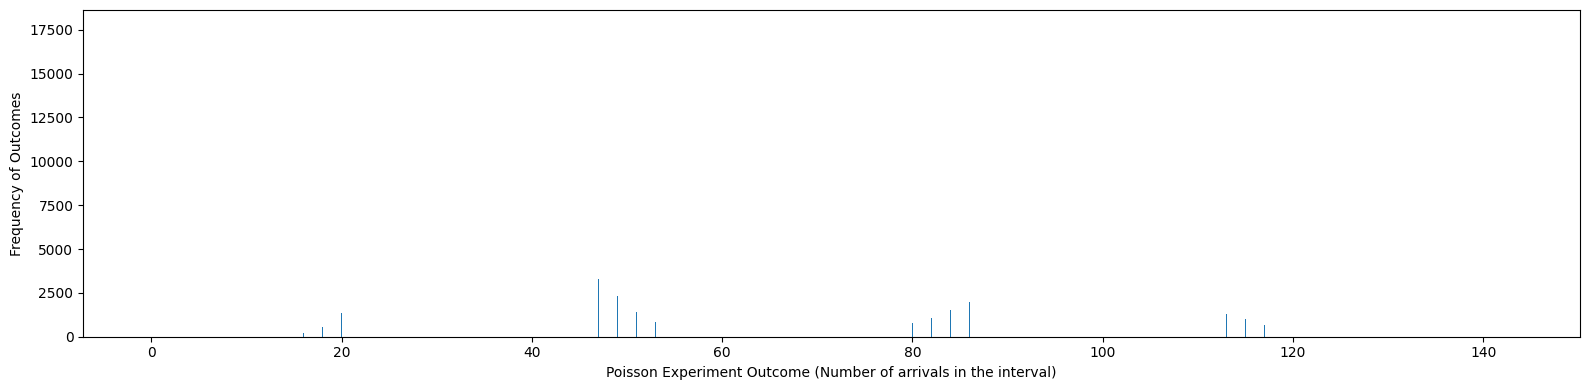

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, figsize=(16,4))
#histVal = ax1.hist(outcomeOfBinomialExp + 1, bins=range(0,v_binomial_n+1), density=True, align='left')

histVal = np.histogram(outcomes, bins=range(0,np.max(outcomes)+2), density=False)#, rwidth=1)

print("The histogram values are:", histVal)

ax.bar(histVal[1][0:-1], histVal[0], width = 0.01)
# ax1.set_xscale("linear")
ax.set_xlabel("Poisson Experiment Outcome (Number of arrivals in the interval)")
ax.set_ylabel(textwrap.fill("Frequency of Outcomes", 100))


plt.tight_layout(h_pad = 5.0)

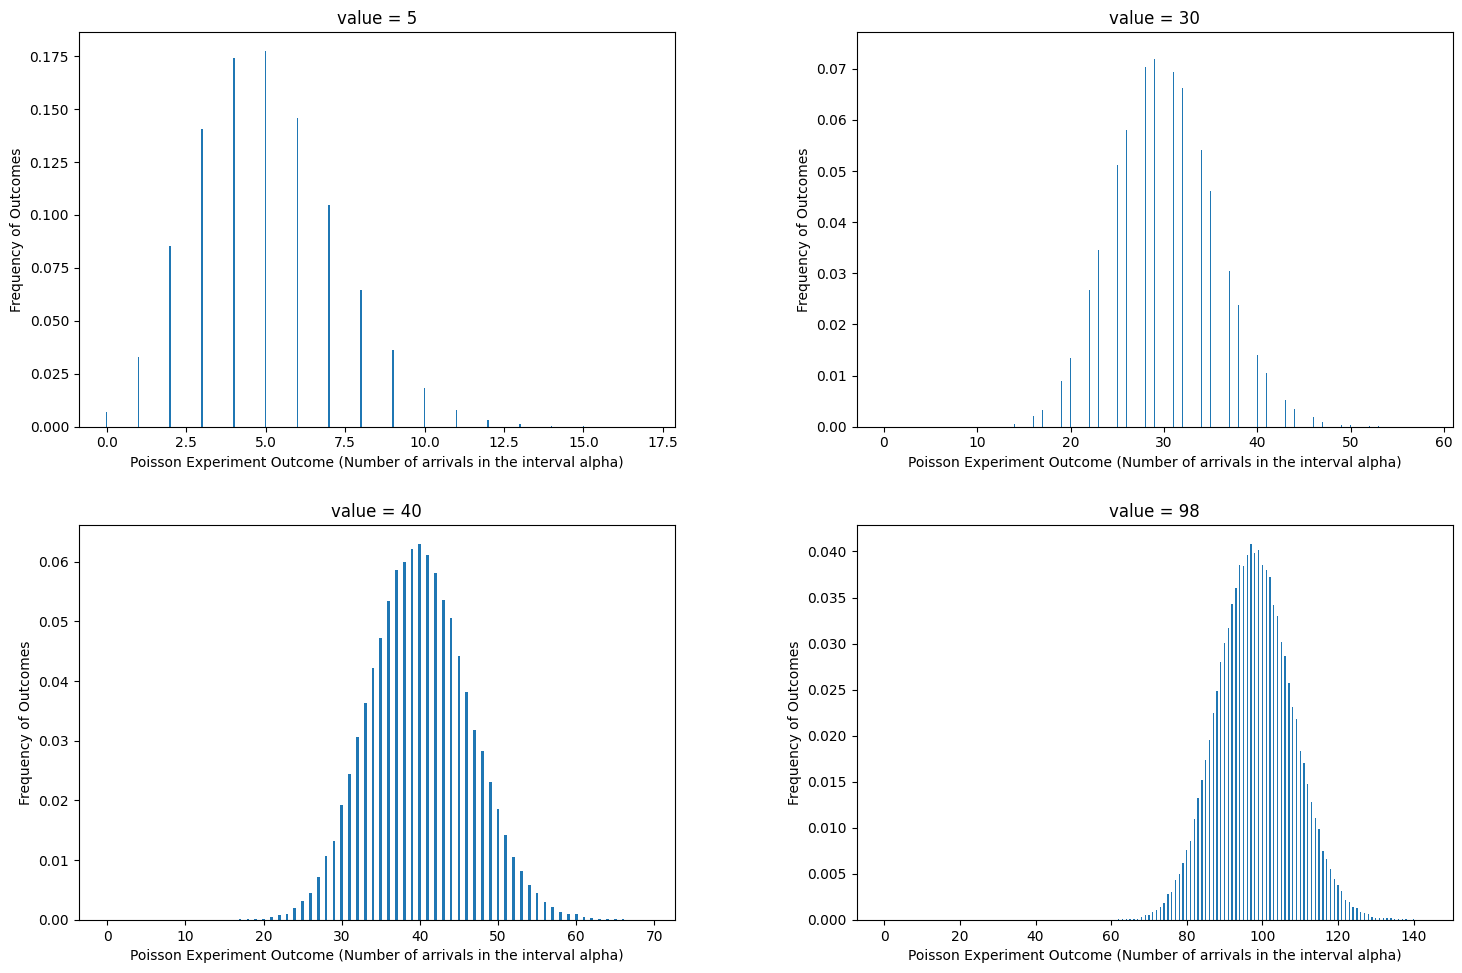

In [ ]:
#Possion Graphs


fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(15,10))
plt.tight_layout(pad = 3.0, w_pad=10.0,h_pad=5.0)

obsId = 0
widthArr = [0.05, 0.05, 0.35, 0.35]
for rowid in range(2):
    for colid in range(2):
        histVal = np.histogram(outcomes[obsId], bins=range(0,np.max(outcomes[obsId])+2), density=False)


        ax[rowid][colid].bar(histVal[1][0:-1], histVal[0]/100000, width = widthArr[obsId])
        ax[rowid][colid].set_xscale("linear")
        ax[rowid][colid].set_xlabel("Poisson Experiment Outcome (Number of arrivals in the interval alpha)")
        ax[rowid][colid].set_ylabel("Frequency of Outcomes")
        ax[rowid][colid].set_title("value = " + str(value[0][obsId]))
        obsId = obsId + 1

Random Values  [2, 5]


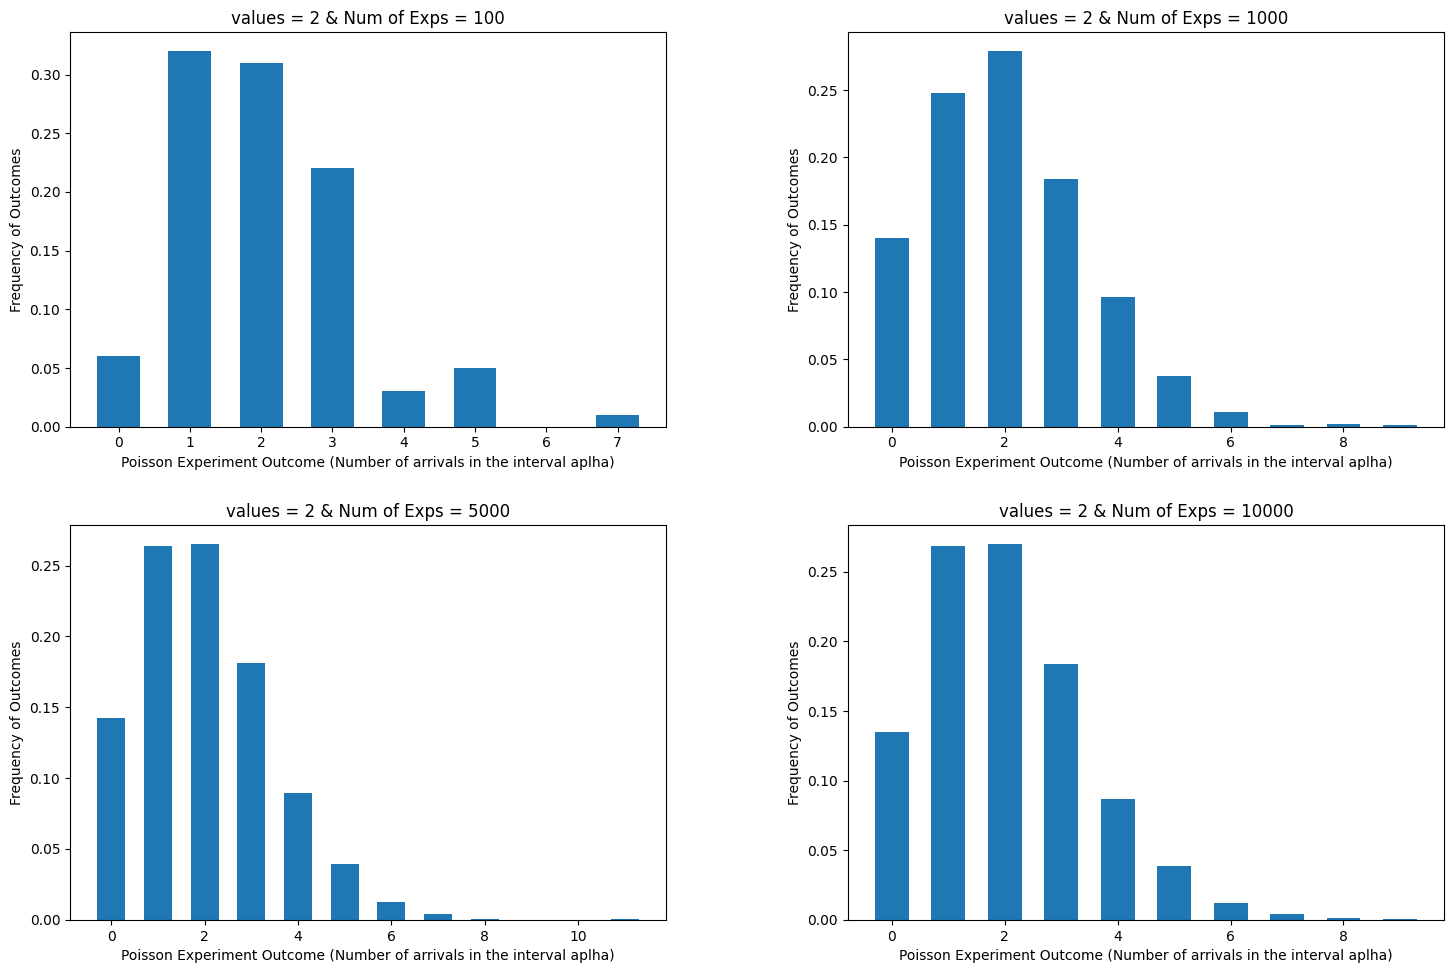

In [61]:
#Question 3

frequentists = [[],[]]

numberOfExps = [100,1000,5000,10000]
np.random.seed(36)  # Set the seed value
value_list = sorted(np.random.randint(0, 21, size=2))  # Generate random array
print("Random Values ",value_list)
values = value_list

for j in range(len(values)):
    for i in range(len(numberOfExps)):
        outcomes = np.ndarray((1,numberOfExps[i]))
        outcomes = np.random.poisson(lam = values[j], size=outcomes.shape)
        frequentists[j].append(outcomes)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(15,10))
plt.tight_layout(pad = 3.0, w_pad=10.0,h_pad=5.0)
obsIdx = 0

for rowidx in range(2):
    for colidx in range(2):
        # print("The outcomes are", frequentists[obsIdx], "obsIdx:", obsIdx)
        histVal = np.histogram(frequentists[0][obsIdx], bins=range(0,np.max(frequentists[0][obsIdx])+2), density=False)
        # print("The histogram[1] values are:", histVal[1])
        # print("The histogram[0] values are:", histVal[0])

        ax[rowidx][colidx].bar(histVal[1][0:-1], histVal[0]/numberOfExps[obsIdx], width = 0.6)
        ax[rowidx][colidx].set_xscale("linear")
        ax[rowidx][colidx].set_xlabel("Poisson Experiment Outcome (Number of arrivals in the interval aplha)")
        ax[rowidx][colidx].set_ylabel("Frequency of Outcomes")
        ax[rowidx][colidx].set_title("values = " + str(values[0]) + " & Num of Exps = " + str(numberOfExps[obsIdx]))
        obsIdx = obsIdx + 1

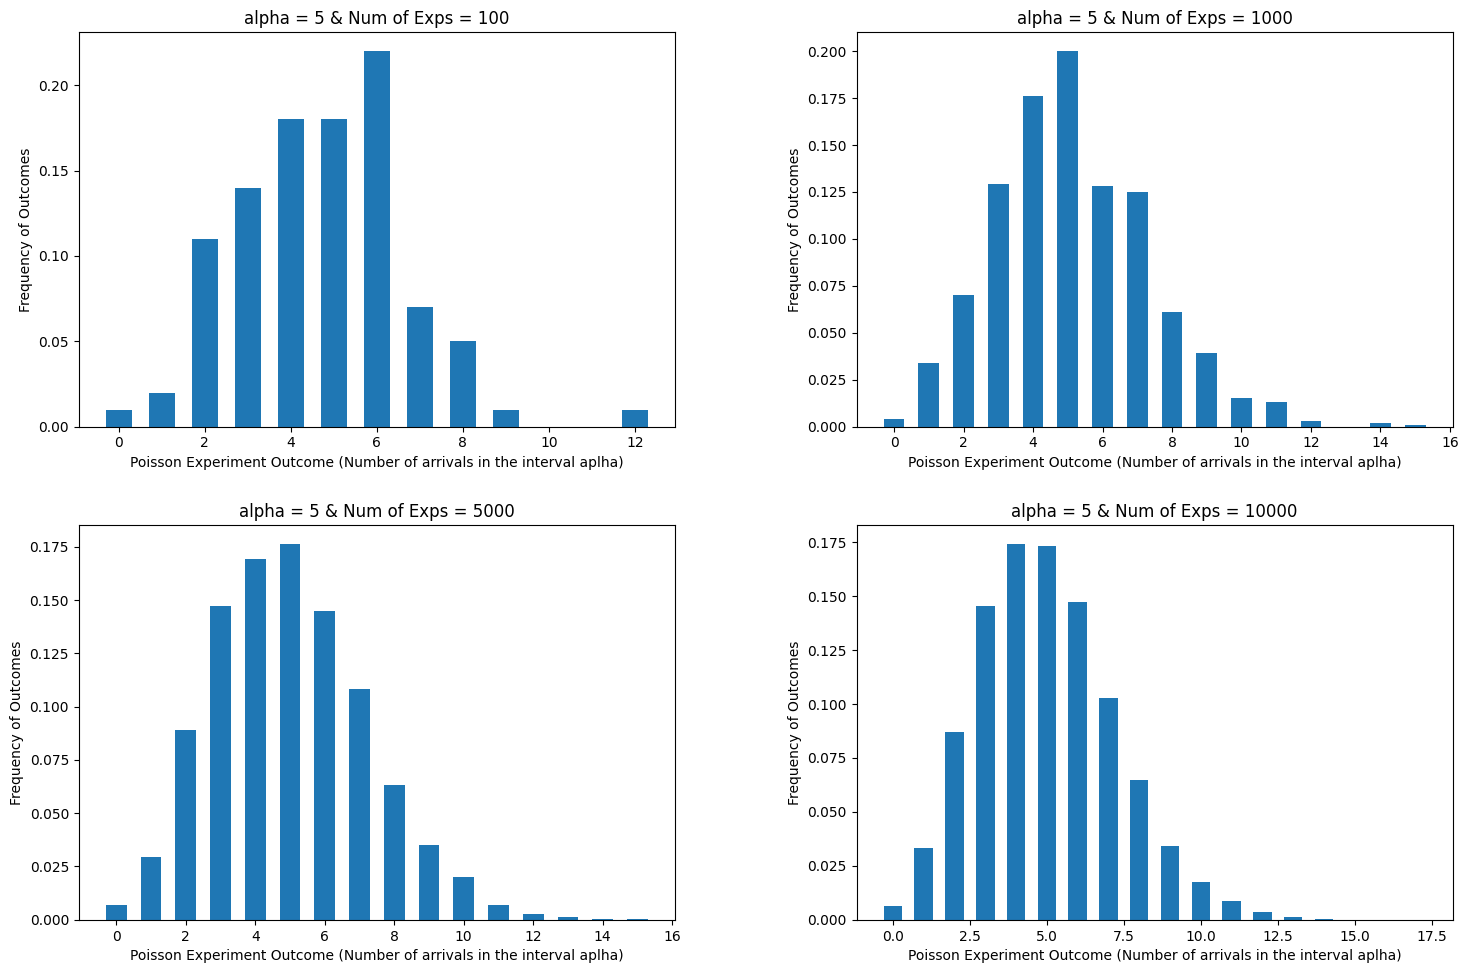

In [62]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(15,10))
plt.tight_layout(pad = 3.0, w_pad=10.0,h_pad=5.0)
obsIdx = 0

for rowidx in range(2):
    for colidx in range(2):
        # print("The outcomes are", frequentists[obsIdx], "obsIdx:", obsIdx)
        histVal = np.histogram(frequentists[1][obsIdx], bins=range(0,np.max(frequentists[1][obsIdx])+2), density=False)
        # print("The histogram[1] values are:", histVal[1])
        # print("The histogram[0] values are:", histVal[0])

        ax[rowidx][colidx].bar(histVal[1][0:-1], histVal[0]/numberOfExps[obsIdx], width = 0.6)
        ax[rowidx][colidx].set_xscale("linear")
        ax[rowidx][colidx].set_xlabel("Poisson Experiment Outcome (Number of arrivals in the interval aplha)")
        ax[rowidx][colidx].set_ylabel("Frequency of Outcomes")
        ax[rowidx][colidx].set_title("alpha = " + str(values[1]) + " & Num of Exps = " + str(numberOfExps[obsIdx]))
        obsIdx = obsIdx + 1